In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

In [3]:
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100,1)

## Normal equations

In [10]:
X_b = np.c_[np.ones((100,1)), X] ## add x0 = 1 in each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[4.11559754],
       [2.85103125]])

In [12]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.11559754],
       [9.81766004]])

(0.0, 2.0, 0.0, 15.0)

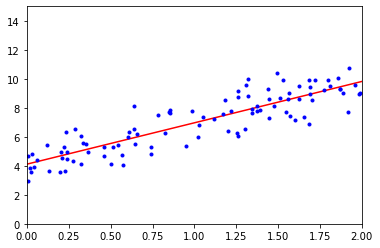

In [15]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.axis([0, 2, 0, 15])

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [19]:
lin_reg.intercept_, lin_reg.coef_

(array([4.11559754]), array([[2.85103125]]))

In [20]:
lin_reg.predict(X_new)

array([[4.11559754],
       [9.81766004]])

In [25]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [26]:
theta_best_svd

array([[4.11559754],
       [2.85103125]])

In [31]:
np.linalg.pinv(X_b).dot(y)

array([[4.11559754],
       [2.85103125]])